# Neural Networks for Classification, and Clustering

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [3]:
ID = 2051998
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 42 54 57 50 42 41 49 51 60]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


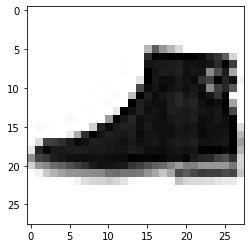

LABEL: 9
INPUT:


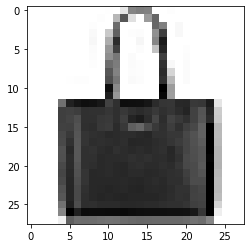

LABEL: 8
INPUT:


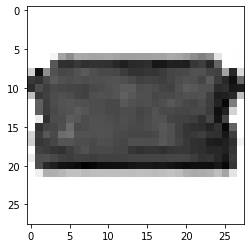

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
gridSearch = GridSearchCV(mlp_cv, hl_parameters, cv=5)
gridSearch.fit(X_train,y_train)
    
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridSearch.best_params_)

print("Score with best parameters:")
print(gridSearch.best_score_)

print("\nAll scores on the grid:")
print(gridSearch.cv_results_)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.792

All scores on the grid:
{'mean_fit_time': array([0.67497864, 0.96655545, 0.26948581, 0.59302826]), 'std_fit_time': array([0.16834269, 0.03805584, 0.03209772, 0.22659953]), 'mean_score_time': array([0.00099649, 0.00119662, 0.00079808, 0.00099711]), 'std_score_time': array([7.62939453e-07, 3.97920966e-04, 3.99042696e-04, 6.64157308e-07]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (50,), (10, 10), (50, 50)],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}], 'split0_test_score': array([0.38, 0.8 , 0.63, 0.75]), 'split1_test_score': array([0.71, 0.81, 0.55, 0.79]), 'split2_test_score': array([0.74, 0.79, 0.78, 0.77]), 'split3_test_score': array([0.72, 0.77, 0.6 , 0.79]), 'split4_test_sc

## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

The result for 10 neurons and 1 hidden layer the score is 0.65
The result for 50 neurons and 1 hidden layer the score is 0.792
The result for 10 neurons and 2 hidden layer the score is 0.532
The result for 50 neurons and 2 hidden layer the score is 0.776 

Best result is obtained when the number of neurons are increased whereas there is no much change in result when hidden layer is increased

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [9]:
#get training and test error for the best NN model from CV

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID, hidden_layer_sizes=(25,), verbose=True)
mlp.fit(X_train,y_train)

training_error = 1. - mlp.score(X_train, y_train)

test_error = 1. - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.23491903
Iteration 2, loss = 1.65312581
Iteration 3, loss = 1.39238340
Iteration 4, loss = 0.94868744
Iteration 5, loss = 0.95214853
Iteration 6, loss = 0.82783418
Iteration 7, loss = 0.68006396
Iteration 8, loss = 0.60126940
Iteration 9, loss = 0.55428932
Iteration 10, loss = 0.50118175
Iteration 11, loss = 0.48019322
Iteration 12, loss = 0.42746870
Iteration 13, loss = 0.40621904
Iteration 14, loss = 0.32164951
Iteration 15, loss = 0.32727930
Iteration 16, loss = 0.38149245
Iteration 17, loss = 0.26987695
Iteration 18, loss = 0.27374162
Iteration 19, loss = 0.23157931
Iteration 20, loss = 0.31955497
Iteration 21, loss = 0.20953823
Iteration 22, loss = 0.19146667
Iteration 23, loss = 0.17265256
Iteration 24, loss = 0.18594496
Iteration 25, loss = 0.27227754
Iteration 26, loss = 0.21490140
Iteration 27, loss = 0.16040825
Iteration 28, loss = 0.14964326
Iteration 29, loss = 0.17283541
Iteration 30, loss = 0.20290663
Iteration 31, loss = 0.17095906
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1034,  994,  997, 1009,  993,  995,  993, 1021,  993,  971],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = MLPClassifier(max_iter=50, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID, verbose=True)
GS_CV = GridSearchCV(mlp_large_cv, hl_parameters, cv=5, verbose=True)
GS_CV.fit(X_train, y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(GS_CV.best_params_)

print("Score with best parameters:")
print(GS_CV.best_score_)

print("\nAll scores on the grid:")
print(GS_CV.cv_results_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Iteration 1, loss = 1.23587398
Iteration 2, loss = 0.65936105
Iteration 3, loss = 0.54151440
Iteration 4, loss = 0.49385153
Iteration 5, loss = 0.48494783
Iteration 6, loss = 0.45150179
Iteration 7, loss = 0.43163933
Iteration 8, loss = 0.41310924
Iteration 9, loss = 0.41431347
Iteration 10, loss = 0.39808539
Iteration 11, loss = 0.39731951
Iteration 12, loss = 0.38004774
Iteration 13, loss = 0.36683556
Iteration 14, loss = 0.37763441
Iteration 15, loss = 0.35815620
Iteration 16, loss = 0.35895180
Iteration 17, loss = 0.35689411
Iteration 18, loss = 0.34525345
Iteration 19, loss = 0.35070440
Iteration 20, loss = 0.34649555
Iteration 21, loss = 0.33038446
Iteration 22, loss = 0.32675327
Iteration 23, loss = 0.32080759
Iteration 24, loss = 0.31963739
Iteration 25, loss = 0.33073655
Iteration 26, loss = 0.31867702
Iteration 27, loss = 0.31356816
Iteration 28, loss = 0.31014858
Iteration 29, loss = 0.30637664
Iteration 30, loss = 

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.25726189
Iteration 2, loss = 0.66855680
Iteration 3, loss = 0.53680780
Iteration 4, loss = 0.49045834
Iteration 5, loss = 0.48981272
Iteration 6, loss = 0.45749934
Iteration 7, loss = 0.44039103
Iteration 8, loss = 0.42130033
Iteration 9, loss = 0.42144670
Iteration 10, loss = 0.39993472
Iteration 11, loss = 0.40494530
Iteration 12, loss = 0.37465901
Iteration 13, loss = 0.38146512
Iteration 14, loss = 0.37827126
Iteration 15, loss = 0.36655644
Iteration 16, loss = 0.36725868
Iteration 17, loss = 0.36140347
Iteration 18, loss = 0.35081333
Iteration 19, loss = 0.35022994
Iteration 20, loss = 0.34213559
Iteration 21, loss = 0.34614536
Iteration 22, loss = 0.34979740
Iteration 23, loss = 0.32829712
Iteration 24, loss = 0.32939645
Iteration 25, loss = 0.33373366
Iteration 26, loss = 0.32015835
Iteration 27, loss = 0.32405950
Iteration 28, loss = 0.31224441
Iteration 29, loss = 0.30837069
Iteration 30, loss = 0.31267110
Iteration 31, loss = 0.31259982
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.56480652
Iteration 4, loss = 0.50085580
Iteration 5, loss = 0.49854607
Iteration 6, loss = 0.46649683
Iteration 7, loss = 0.44780806
Iteration 8, loss = 0.41994749
Iteration 9, loss = 0.41006418
Iteration 10, loss = 0.40460474
Iteration 11, loss = 0.39546968
Iteration 12, loss = 0.37240638
Iteration 13, loss = 0.37805694
Iteration 14, loss = 0.37384895
Iteration 15, loss = 0.36150245
Iteration 16, loss = 0.34677600
Iteration 17, loss = 0.35083096
Iteration 18, loss = 0.34951451
Iteration 19, loss = 0.34287402
Iteration 20, loss = 0.33651471
Iteration 21, loss = 0.33988896
Iteration 22, loss = 0.33439686
Iteration 23, loss = 0.32448438
Iteration 24, loss = 0.31781136
Iteration 25, loss = 0.31203681
Iteration 26, loss = 0.31249348
Iteration 27, loss = 0.31793986
Iteration 28, loss = 0.30961641
Iteration 29, loss = 0.30364679
Iteration 30, loss = 0.32068186
Iteration 31, loss = 0.29978208
Iteration 32, loss = 0.30462007
Iteration 33, loss = 0.29399890
Iteration 34, l

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.24567495
Iteration 2, loss = 0.63442133
Iteration 3, loss = 0.53288675
Iteration 4, loss = 0.47039829
Iteration 5, loss = 0.45439512
Iteration 6, loss = 0.44070402
Iteration 7, loss = 0.43161351
Iteration 8, loss = 0.40379499
Iteration 9, loss = 0.40560964
Iteration 10, loss = 0.39292444
Iteration 11, loss = 0.38335170
Iteration 12, loss = 0.37458042
Iteration 13, loss = 0.36426545
Iteration 14, loss = 0.36204614
Iteration 15, loss = 0.36573608
Iteration 16, loss = 0.35025439
Iteration 17, loss = 0.33526211
Iteration 18, loss = 0.34980969
Iteration 19, loss = 0.33844228
Iteration 20, loss = 0.32909306
Iteration 21, loss = 0.33285837
Iteration 22, loss = 0.32269523
Iteration 23, loss = 0.33350310
Iteration 24, loss = 0.31526877
Iteration 25, loss = 0.31531497
Iteration 26, loss = 0.31068174
Iteration 27, loss = 0.32296418
Iteration 28, loss = 0.30516691
Iteration 29, loss = 0.29803251
Iteration 30, loss = 0.30803810
Iteration 31, loss = 0.30439571
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.61032328
Iteration 4, loss = 0.54860803
Iteration 5, loss = 0.52952644
Iteration 6, loss = 0.51848945
Iteration 7, loss = 0.48460041
Iteration 8, loss = 0.45719661
Iteration 9, loss = 0.44266024
Iteration 10, loss = 0.45234613
Iteration 11, loss = 0.42037097
Iteration 12, loss = 0.41549225
Iteration 13, loss = 0.41661733
Iteration 14, loss = 0.40809612
Iteration 15, loss = 0.40565847
Iteration 16, loss = 0.39056021
Iteration 17, loss = 0.38709168
Iteration 18, loss = 0.37590114
Iteration 19, loss = 0.37736672
Iteration 20, loss = 0.37750103
Iteration 21, loss = 0.38363303
Iteration 22, loss = 0.36499897
Iteration 23, loss = 0.37173106
Iteration 24, loss = 0.35957142
Iteration 25, loss = 0.35759035
Iteration 26, loss = 0.35429087
Iteration 27, loss = 0.34860665
Iteration 28, loss = 0.35514605
Iteration 29, loss = 0.34553763
Iteration 30, loss = 0.34903192
Iteration 31, loss = 0.33948746
Iteration 32, loss = 0.33143027
Iteration 33, loss = 0.33483746
Iteration 34, l

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.02204925
Iteration 2, loss = 0.52846944
Iteration 3, loss = 0.47154031
Iteration 4, loss = 0.42223781
Iteration 5, loss = 0.40212757
Iteration 6, loss = 0.38273035
Iteration 7, loss = 0.35142492
Iteration 8, loss = 0.34452651
Iteration 9, loss = 0.33769786
Iteration 10, loss = 0.31860835
Iteration 11, loss = 0.30582747
Iteration 12, loss = 0.29510442
Iteration 13, loss = 0.29111403
Iteration 14, loss = 0.28135521
Iteration 15, loss = 0.27076683
Iteration 16, loss = 0.25606552
Iteration 17, loss = 0.25187788
Iteration 18, loss = 0.24518380
Iteration 19, loss = 0.23577627
Iteration 20, loss = 0.24206249
Iteration 21, loss = 0.23233894
Iteration 22, loss = 0.21781768
Iteration 23, loss = 0.21698257
Iteration 24, loss = 0.21587081
Iteration 25, loss = 0.23187125
Iteration 26, loss = 0.19548814
Iteration 27, loss = 0.19236970
Iteration 28, loss = 0.18282426
Iteration 29, loss = 0.18801362
Iteration 30, loss = 0.18943795
Iteration 31, loss = 0.17717575
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.53182140
Iteration 3, loss = 0.46414198
Iteration 4, loss = 0.42823289
Iteration 5, loss = 0.40332828
Iteration 6, loss = 0.38605251
Iteration 7, loss = 0.35325965
Iteration 8, loss = 0.34517668
Iteration 9, loss = 0.32801200
Iteration 10, loss = 0.31721743
Iteration 11, loss = 0.30514699
Iteration 12, loss = 0.29973250
Iteration 13, loss = 0.28771119
Iteration 14, loss = 0.29683461
Iteration 15, loss = 0.27255984
Iteration 16, loss = 0.26717333
Iteration 17, loss = 0.25453813
Iteration 18, loss = 0.25186008
Iteration 19, loss = 0.24410071
Iteration 20, loss = 0.23633097
Iteration 21, loss = 0.22871941
Iteration 22, loss = 0.22368264
Iteration 23, loss = 0.23170120
Iteration 24, loss = 0.21802035
Iteration 25, loss = 0.21295836
Iteration 26, loss = 0.19552538
Iteration 27, loss = 0.19079388
Iteration 28, loss = 0.19060359
Iteration 29, loss = 0.20147476
Iteration 30, loss = 0.18654306
Iteration 31, loss = 0.17193075
Iteration 32, loss = 0.17967590
Iteration 33, lo

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.51974390
Iteration 3, loss = 0.45325911
Iteration 4, loss = 0.41473674
Iteration 5, loss = 0.39674561
Iteration 6, loss = 0.36618403
Iteration 7, loss = 0.34419002
Iteration 8, loss = 0.33715489
Iteration 9, loss = 0.32245070
Iteration 10, loss = 0.30553541
Iteration 11, loss = 0.29209471
Iteration 12, loss = 0.29317372
Iteration 13, loss = 0.26462440
Iteration 14, loss = 0.27508225
Iteration 15, loss = 0.26029545
Iteration 16, loss = 0.25612316
Iteration 17, loss = 0.24115598
Iteration 18, loss = 0.24173323
Iteration 19, loss = 0.23183028
Iteration 20, loss = 0.22474933
Iteration 21, loss = 0.21061501
Iteration 22, loss = 0.22825001
Iteration 23, loss = 0.21832399
Iteration 24, loss = 0.20124838
Iteration 25, loss = 0.19930125
Iteration 26, loss = 0.19193117
Iteration 27, loss = 0.17539607
Iteration 28, loss = 0.18501286
Iteration 29, loss = 0.17898176
Iteration 30, loss = 0.17332242
Iteration 31, loss = 0.16104996
Iteration 32, loss = 0.16261552
Iteration 33, lo

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.52175089
Iteration 3, loss = 0.44924300
Iteration 4, loss = 0.41527248
Iteration 5, loss = 0.38806532
Iteration 6, loss = 0.36411046
Iteration 7, loss = 0.34045827
Iteration 8, loss = 0.33171795
Iteration 9, loss = 0.31323272
Iteration 10, loss = 0.29896372
Iteration 11, loss = 0.29178119
Iteration 12, loss = 0.27879445
Iteration 13, loss = 0.26551544
Iteration 14, loss = 0.25804216
Iteration 15, loss = 0.25668616
Iteration 16, loss = 0.24412757
Iteration 17, loss = 0.23954891
Iteration 18, loss = 0.23136672
Iteration 19, loss = 0.22183790
Iteration 20, loss = 0.21302625
Iteration 21, loss = 0.20949064
Iteration 22, loss = 0.19858183
Iteration 23, loss = 0.20047975
Iteration 24, loss = 0.19244317
Iteration 25, loss = 0.17979579
Iteration 26, loss = 0.19814194
Iteration 27, loss = 0.17806842
Iteration 28, loss = 0.17185939
Iteration 29, loss = 0.16195061
Iteration 30, loss = 0.16017796
Iteration 31, loss = 0.14474421
Iteration 32, loss = 0.15335383
Iteration 33, lo

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.96600744
Iteration 2, loss = 0.53171388
Iteration 3, loss = 0.46750628
Iteration 4, loss = 0.42301923
Iteration 5, loss = 0.40428242
Iteration 6, loss = 0.37839088
Iteration 7, loss = 0.35415706
Iteration 8, loss = 0.33286763
Iteration 9, loss = 0.32382092
Iteration 10, loss = 0.31302465
Iteration 11, loss = 0.30524384
Iteration 12, loss = 0.29467402
Iteration 13, loss = 0.27544181
Iteration 14, loss = 0.27205985
Iteration 15, loss = 0.25919888
Iteration 16, loss = 0.25725857
Iteration 17, loss = 0.24281670
Iteration 18, loss = 0.23384900
Iteration 19, loss = 0.22801817
Iteration 20, loss = 0.21696062
Iteration 21, loss = 0.21218997
Iteration 22, loss = 0.20751432
Iteration 23, loss = 0.20113966
Iteration 24, loss = 0.20591105
Iteration 25, loss = 0.18255101
Iteration 26, loss = 0.19970217
Iteration 27, loss = 0.17548770
Iteration 28, loss = 0.17053012
Iteration 29, loss = 0.17441495
Iteration 30, loss = 0.16341984
Iteration 31, loss = 0.16657656
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50596079
Iteration 2, loss = 0.78306291
Iteration 3, loss = 0.66862017
Iteration 4, loss = 0.61425531
Iteration 5, loss = 0.58161571
Iteration 6, loss = 1.10381399
Iteration 7, loss = 0.74807862
Iteration 8, loss = 0.68002147
Iteration 9, loss = 0.63949818
Iteration 10, loss = 0.61660400
Iteration 11, loss = 0.63157803
Iteration 12, loss = 0.59300351
Iteration 13, loss = 0.66610799
Iteration 14, loss = 0.54659553
Iteration 15, loss = 0.55575851
Iteration 16, loss = 0.66114856
Iteration 17, loss = 0.52863999
Iteration 18, loss = 0.51462429
Iteration 19, loss = 0.52268634
Iteration 20, loss = 0.49797843
Iteration 21, loss = 0.48704602
Iteration 22, loss = 0.50661741
Iteration 23, loss = 0.50777080
Iteration 24, loss = 0.48971024
Iteration 25, loss = 0.48611527
Iteration 26, loss = 0.45183718
Iteration 27, loss = 0.51057214
Iteration 28, loss = 0.46187869
Iteration 29, loss = 0.47391236
Iteration 30, loss = 0.46809656
Iteration 31, loss = 0.46336839
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.61212130
Iteration 2, loss = 0.84165622
Iteration 3, loss = 0.73136499
Iteration 4, loss = 0.61192339
Iteration 5, loss = 0.58014223
Iteration 6, loss = 0.52982466
Iteration 7, loss = 0.51492270
Iteration 8, loss = 0.48876669
Iteration 9, loss = 0.47158576
Iteration 10, loss = 0.45716926
Iteration 11, loss = 0.45061351
Iteration 12, loss = 0.45783216
Iteration 13, loss = 0.45511450
Iteration 14, loss = 0.43157310
Iteration 15, loss = 0.41386226
Iteration 16, loss = 0.41814264
Iteration 17, loss = 0.56434483
Iteration 18, loss = 0.56990229
Iteration 19, loss = 0.52493504
Iteration 20, loss = 0.48556350
Iteration 21, loss = 0.42142954
Iteration 22, loss = 0.41291576
Iteration 23, loss = 0.39988230
Iteration 24, loss = 0.40518525
Iteration 25, loss = 0.37978262
Iteration 26, loss = 0.39033700
Iteration 27, loss = 0.37290709
Iteration 28, loss = 0.36744534
Iteration 29, loss = 0.37513233
Iteration 30, loss = 0.38773153
Iteration 31, loss = 0.35670741
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.72590740
Iteration 3, loss = 0.59085393
Iteration 4, loss = 0.62251764
Iteration 5, loss = 0.50552388
Iteration 6, loss = 0.47575259
Iteration 7, loss = 0.44577893
Iteration 8, loss = 0.43104103
Iteration 9, loss = 0.45651430
Iteration 10, loss = 0.41914389
Iteration 11, loss = 0.42053119
Iteration 12, loss = 0.39916406
Iteration 13, loss = 0.39131062
Iteration 14, loss = 0.37703261
Iteration 15, loss = 0.36904458
Iteration 16, loss = 0.36867115
Iteration 17, loss = 0.37710297
Iteration 18, loss = 0.36749427
Iteration 19, loss = 0.34980918
Iteration 20, loss = 0.34558213
Iteration 21, loss = 0.35132048
Iteration 22, loss = 0.34189141
Iteration 23, loss = 0.34546951
Iteration 24, loss = 0.34815492
Iteration 25, loss = 0.33855280
Iteration 26, loss = 0.32424476
Iteration 27, loss = 0.33000597
Iteration 28, loss = 0.31560710
Iteration 29, loss = 0.33255892
Iteration 30, loss = 0.30405490
Iteration 31, loss = 0.31691217
Iteration 32, loss = 0.45449737
Iteration 33, lo

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.68920707
Iteration 3, loss = 0.59043888
Iteration 4, loss = 0.53608848
Iteration 5, loss = 0.48489437
Iteration 6, loss = 0.47016579
Iteration 7, loss = 0.46567266
Iteration 8, loss = 0.43416912
Iteration 9, loss = 0.43761624
Iteration 10, loss = 0.41512321
Iteration 11, loss = 0.39641129
Iteration 12, loss = 0.40919292
Iteration 13, loss = 0.38361126
Iteration 14, loss = 0.39041898
Iteration 15, loss = 0.37258137
Iteration 16, loss = 0.39026287
Iteration 17, loss = 0.36274936
Iteration 18, loss = 0.35579164
Iteration 19, loss = 0.36106502
Iteration 20, loss = 0.34763550
Iteration 21, loss = 0.33679279
Iteration 22, loss = 0.33498936
Iteration 23, loss = 0.32817132
Iteration 24, loss = 0.32928483
Iteration 25, loss = 0.32155907
Iteration 26, loss = 0.32369708
Iteration 27, loss = 0.33086357
Iteration 28, loss = 0.31961061
Iteration 29, loss = 0.30641233
Iteration 30, loss = 0.29554403
Iteration 31, loss = 0.31277990
Iteration 32, loss = 0.32660223
Iteration 33, lo

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.56632102
Iteration 3, loss = 0.48196393
Iteration 4, loss = 0.41749618
Iteration 5, loss = 0.38656963
Iteration 6, loss = 0.37464719
Iteration 7, loss = 0.34993015
Iteration 8, loss = 0.32449722
Iteration 9, loss = 0.32141753
Iteration 10, loss = 0.30603026
Iteration 11, loss = 0.29595672
Iteration 12, loss = 0.26898977
Iteration 13, loss = 0.26634978
Iteration 14, loss = 0.25530582
Iteration 15, loss = 0.25209399
Iteration 16, loss = 0.24151609
Iteration 17, loss = 0.25650905
Iteration 18, loss = 0.23438690
Iteration 19, loss = 0.21976503
Iteration 20, loss = 0.21112415
Iteration 21, loss = 0.20575605
Iteration 22, loss = 0.21161933
Iteration 23, loss = 0.18771231
Iteration 24, loss = 0.18814050
Iteration 25, loss = 0.17546694
Iteration 26, loss = 0.19530557
Iteration 27, loss = 0.17760052
Iteration 28, loss = 0.16650848
Iteration 29, loss = 0.17099761
Iteration 30, loss = 0.17989832
Iteration 31, loss = 0.17657126
Iteration 32, loss = 0.17333515
Iteration 33, lo

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.57400179
Iteration 3, loss = 0.48418348
Iteration 4, loss = 0.42596435
Iteration 5, loss = 0.40048281
Iteration 6, loss = 0.39244516
Iteration 7, loss = 0.35358400
Iteration 8, loss = 0.33211892
Iteration 9, loss = 0.32478152
Iteration 10, loss = 0.31416860
Iteration 11, loss = 0.29627333
Iteration 12, loss = 0.28722963
Iteration 13, loss = 0.27924726
Iteration 14, loss = 0.26671204
Iteration 15, loss = 0.25894926
Iteration 16, loss = 0.25058976
Iteration 17, loss = 0.24308499
Iteration 18, loss = 0.26029938
Iteration 19, loss = 0.24197642
Iteration 20, loss = 0.21538307
Iteration 21, loss = 0.21821822
Iteration 22, loss = 0.21002745
Iteration 23, loss = 0.20351883
Iteration 24, loss = 0.19432393
Iteration 25, loss = 0.20700930
Iteration 26, loss = 0.18643055
Iteration 27, loss = 0.19737954
Iteration 28, loss = 0.18157952
Iteration 29, loss = 0.18573056
Iteration 30, loss = 0.17085285
Iteration 31, loss = 0.16228089
Iteration 32, loss = 0.16192393
Iteration 33, lo

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.27442977
Iteration 2, loss = 0.59334351
Iteration 3, loss = 0.48517185
Iteration 4, loss = 0.42785186
Iteration 5, loss = 0.40944527
Iteration 6, loss = 0.37956785
Iteration 7, loss = 0.35450925
Iteration 8, loss = 0.35173307
Iteration 9, loss = 0.32688195
Iteration 10, loss = 0.31983840
Iteration 11, loss = 0.31884149
Iteration 12, loss = 0.29888497
Iteration 13, loss = 0.29311039
Iteration 14, loss = 0.27587639
Iteration 15, loss = 0.26616819
Iteration 16, loss = 0.25673775
Iteration 17, loss = 0.25699396
Iteration 18, loss = 0.25647055
Iteration 19, loss = 0.24336693
Iteration 20, loss = 0.23636497
Iteration 21, loss = 0.22575869
Iteration 22, loss = 0.22341463
Iteration 23, loss = 0.21042687
Iteration 24, loss = 0.23134642
Iteration 25, loss = 0.20460474
Iteration 26, loss = 0.20431327
Iteration 27, loss = 0.19825042
Iteration 28, loss = 0.18874913
Iteration 29, loss = 0.17352506
Iteration 30, loss = 0.19318278
Iteration 31, loss = 0.19682077
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.11538056
Iteration 2, loss = 0.55035770
Iteration 3, loss = 0.48005690
Iteration 4, loss = 0.41490155
Iteration 5, loss = 0.38592948
Iteration 6, loss = 0.36138885
Iteration 7, loss = 0.34769045
Iteration 8, loss = 0.32641757
Iteration 9, loss = 0.31005210
Iteration 10, loss = 0.29148371
Iteration 11, loss = 0.29213832
Iteration 12, loss = 0.27479646
Iteration 13, loss = 0.26050868
Iteration 14, loss = 0.25638823
Iteration 15, loss = 0.25821308
Iteration 16, loss = 0.22843871
Iteration 17, loss = 0.26086209
Iteration 18, loss = 0.22830327
Iteration 19, loss = 0.23725947
Iteration 20, loss = 0.21445582
Iteration 21, loss = 0.20485804
Iteration 22, loss = 0.19438702
Iteration 23, loss = 0.19551805
Iteration 24, loss = 0.19816549
Iteration 25, loss = 0.17714320
Iteration 26, loss = 0.17580968
Iteration 27, loss = 0.16259834
Iteration 28, loss = 0.16105974
Iteration 29, loss = 0.16104625
Iteration 30, loss = 0.15613805
Iteration 31, loss = 0.15466963
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.03082416
Iteration 2, loss = 0.55992167
Iteration 3, loss = 0.48646284
Iteration 4, loss = 0.42393545
Iteration 5, loss = 0.39132982
Iteration 6, loss = 0.36758175
Iteration 7, loss = 0.34755549
Iteration 8, loss = 0.33545037
Iteration 9, loss = 0.32215803
Iteration 10, loss = 0.29800005
Iteration 11, loss = 0.29564909
Iteration 12, loss = 0.28186965
Iteration 13, loss = 0.25744827
Iteration 14, loss = 0.26045685
Iteration 15, loss = 0.25319811
Iteration 16, loss = 0.23052456
Iteration 17, loss = 0.23379113
Iteration 18, loss = 0.21781193
Iteration 19, loss = 0.20544571
Iteration 20, loss = 0.21762216
Iteration 21, loss = 0.20694070
Iteration 22, loss = 0.19541282
Iteration 23, loss = 0.20108694
Iteration 24, loss = 0.18310905
Iteration 25, loss = 0.18218900
Iteration 26, loss = 0.17781469
Iteration 27, loss = 0.16438105
Iteration 28, loss = 0.19216311
Iteration 29, loss = 0.16776784
Iteration 30, loss = 0.18089437
Iteration 31, loss = 0.15785309
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.88319614
Iteration 2, loss = 0.50793429
Iteration 3, loss = 0.46196928
Iteration 4, loss = 0.42098273
Iteration 5, loss = 0.38674721
Iteration 6, loss = 0.36751516
Iteration 7, loss = 0.34335619
Iteration 8, loss = 0.32552195
Iteration 9, loss = 0.32341516
Iteration 10, loss = 0.30618748
Iteration 11, loss = 0.29888448
Iteration 12, loss = 0.28812727
Iteration 13, loss = 0.28183777
Iteration 14, loss = 0.27011055
Iteration 15, loss = 0.26127752
Iteration 16, loss = 0.25157114
Iteration 17, loss = 0.25552899
Iteration 18, loss = 0.23619496
Iteration 19, loss = 0.23859845
Iteration 20, loss = 0.23047925
Iteration 21, loss = 0.21871712
Iteration 22, loss = 0.21462198
Iteration 23, loss = 0.21084839
Iteration 24, loss = 0.21433333
Iteration 25, loss = 0.19576466
Iteration 26, loss = 0.20028233
Iteration 27, loss = 0.18297649
Iteration 28, loss = 0.19082379
Iteration 29, loss = 0.18536914
Iteration 30, loss = 0.17883075
Iteration 31, loss = 0.17432974
Iteration 32, los

A:\InstallationDriver\Anaconda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

The score for 10 neurons and 1 hidden layer is 0.8159
The score for 50 neurons and 1 hidden layer is 0.8472
The score for 10 neurons and 2 hidden layer is 0.8072
The score for 50 neurons and 2 hidden layer is 0.8466

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [12]:
#get training and test error for the best NN model from CV

best_mlp_large = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID,hidden_layer_sizes=(50,50,))

best_mlp_large.fit(X_train, y_train)

training_error_large = 1. - best_mlp_large.score(X_train, y_train)

test_error_large = 1. - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.212403


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

The two architectures are different with respect to the number of samples in the training set:

1 hidden layer and 50 neurons for 500 data points.
1 hidden layers and 50 neurons for each layer for 10000 data points.

The Result of the 10000 data points is better than the 500 data points.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


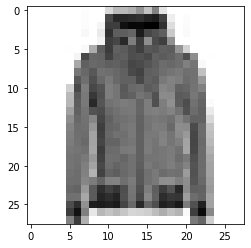

LABEL: 4
For 500 samples: 2
For 10000 samples: 4 


In [13]:
for i in range(y_test.size):
    yp = mlp.predict(X_test)
    ypl = best_mlp_large.predict(X_test)
    if yp[i] != y_test[i] and ypl[i] == y_test[i]:
        plot_input(X_test,y_test,i)
        print('For 500 samples: %s' % yp[i])
        print('For 10000 samples: %s ' % ypl[i])
        break 


Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


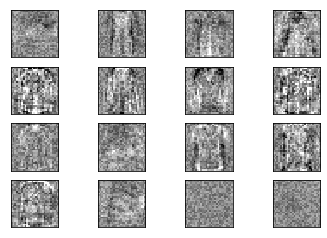

Weights with 10000 data points:


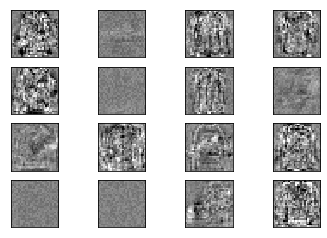

In [14]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

The images are in 10000 data points are more clear and less noise compared with the 500 data point images. 

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

CLASSIFIER CHOOSEN: SVM with rbf kernel

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVM = SVC(kernel='rbf')
parameters = {'C': [1, 10, 100]}
g = GridSearchCV(SVM,parameters,scoring='accuracy')
g.fit(X_train,y_train)

training_error_other = 1. - g.score(X_train,y_train)

test_error_other = 1. - g.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.016700
Best test error (other model): 0.122260


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

With minimum test error is the Neural Networks with 10000 samples, 1 hidden layer and 50 neurons for each. So this architecture is good.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [16]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [17]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [18]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state = ID)
kmeans.fit(X_train,y_train)

KMeans(n_clusters=10, random_state=2041267)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [19]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
y_predict = kmeans.predict(X_test)
mat = sklearn.metrics.cluster.contingency_matrix(y_test, y_predict)
print(mat)

[[   0 1768 3158   52   24    0  486  147    3  182]
 [   0  341  218 5016    3    0  117   51    0   48]
 [   0  136  113    3   24    0  695 3068    1 1777]
 [   0 1835 1626 1962    4    0  242   31    0   95]
 [   0  297  904   97   15    0  291 3000    0 1205]
 [ 452   22    2    0    6  205 3603    0 1497    8]
 [   0  747  976   15   59    1  917 1618    4 1458]
 [ 744    0    0    0    3   21  449    0 4571    0]
 [  49  418   24    3 2571    4  435  271  224 1800]
 [3043   23    3    0    4 2365  176    0  161   13]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

[ADD YOUR ANSWER HERE]

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [20]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state = ID)
    kmeans.fit(X_train,y_train)
    silhouttescore = metrics.silhouette_score(X_test, kmeans.predict(X_test))
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19317571670652278
Silhoutte coefficient for number of clusters=3: 0.18433380720956222
Silhoutte coefficient for number of clusters=4: 0.18042672896786996
Silhoutte coefficient for number of clusters=5: 0.1603201984337485
Silhoutte coefficient for number of clusters=6: 0.15622936969582776
Silhoutte coefficient for number of clusters=7: 0.1667462399786566
Silhoutte coefficient for number of clusters=8: 0.16034511984466143
Silhoutte coefficient for number of clusters=9: 0.1536777083218814
Silhoutte coefficient for number of clusters=10: 0.13566561580397163
Silhoutte coefficient for number of clusters=11: 0.1277787383740401
Silhoutte coefficient for number of clusters=12: 0.1349591125810742
Silhoutte coefficient for number of clusters=13: 0.1335592010143823
Silhoutte coefficient for number of clusters=14: 0.13101268489187756
Silhoutte coefficient for number of clusters=15: 0.12965821137618527


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.